<a href="https://colab.research.google.com/github/geetanjali317/HeartDiseasePrediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading DataSet

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.18k/6.18k [00:00<00:00, 1.71MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [2]:
mv /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2/* /content/

# Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [4]:
heart_data = pd.read_csv('/content/heart.csv')

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_data.shape

(1025, 14)

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# EDA

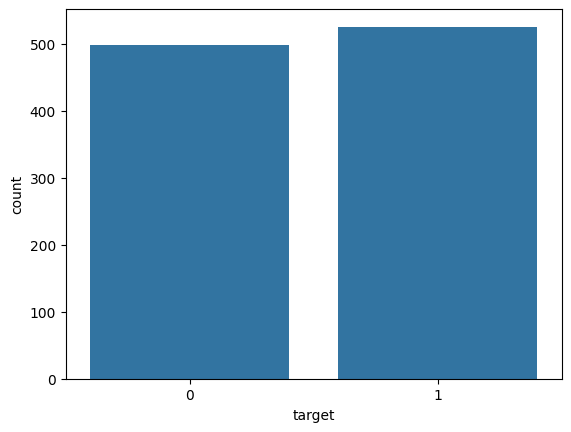

In [10]:
plt.plot()
sns.countplot(x='target', data=heart_data)
plt.show()

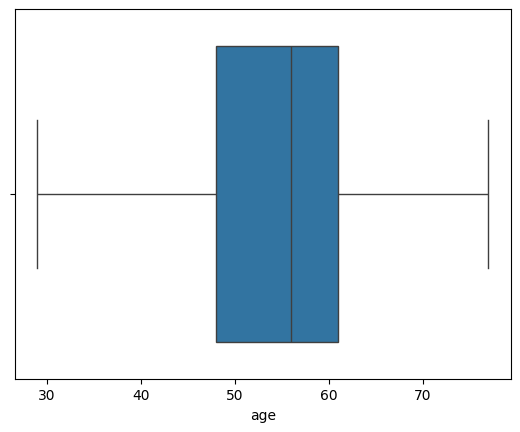

In [13]:
plt.plot()
sns.boxplot(x='age', data=heart_data)
plt.show()

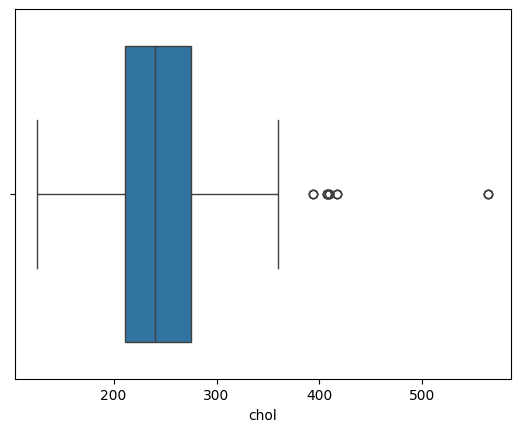

In [14]:
plt.plot()
sns.boxplot(x='chol', data=heart_data)
plt.show()

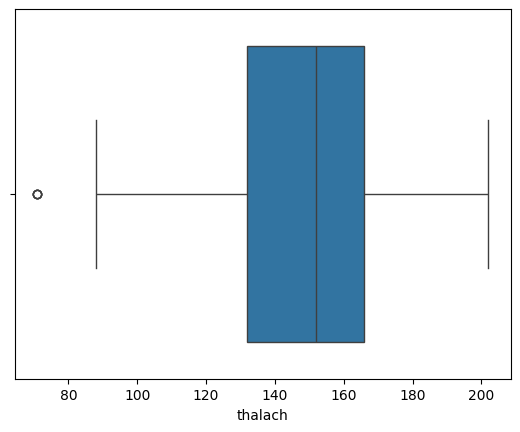

In [15]:
plt.plot()
sns.boxplot(x='thalach', data=heart_data)
plt.show()

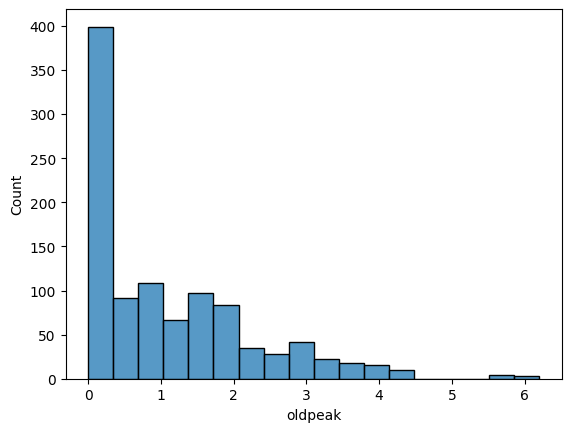

In [18]:
plt.plot()
sns.histplot(x='oldpeak', data=heart_data)
plt.show()

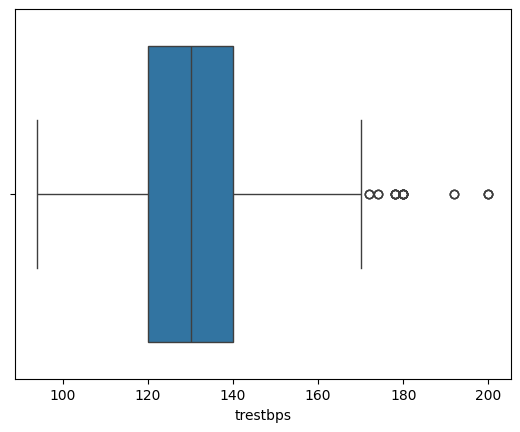

In [21]:
plt.plot()
sns.boxplot(x='trestbps', data=heart_data)
plt.show()

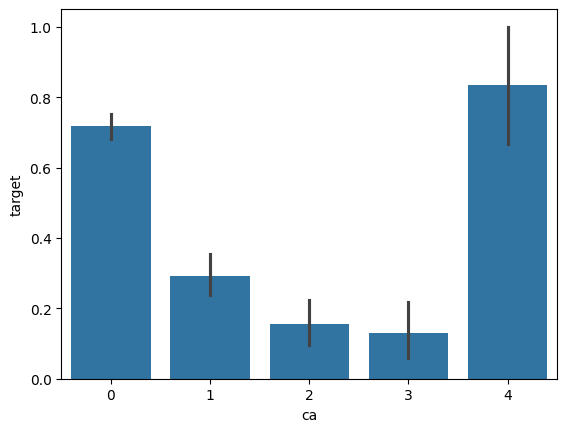

In [26]:
plt.plot()
sns.barplot(x='ca', y='target', data=heart_data)
plt.show()

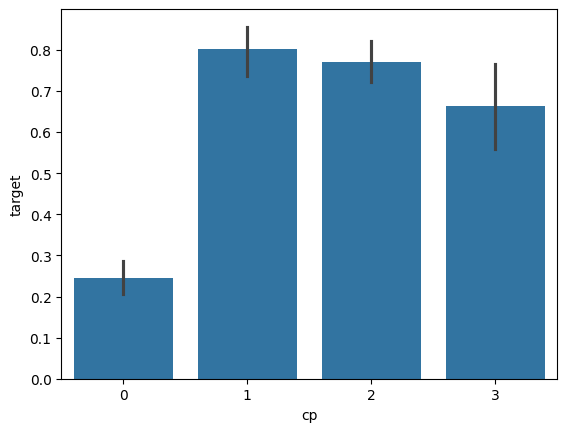

In [27]:
plt.plot()
sns.barplot(x='cp', y='target', data=heart_data)
plt.show()

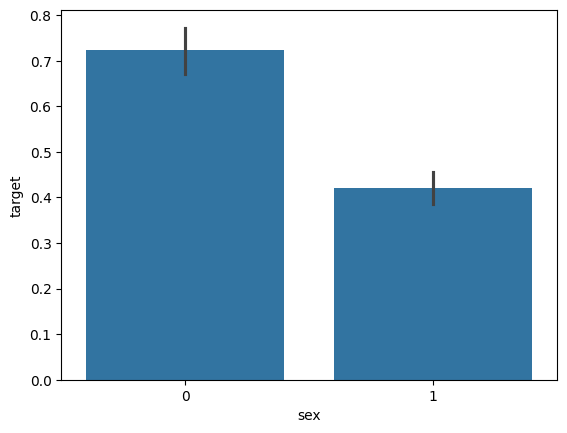

In [28]:
plt.plot()
sns.barplot(x='sex', y='target', data=heart_data)
plt.show()

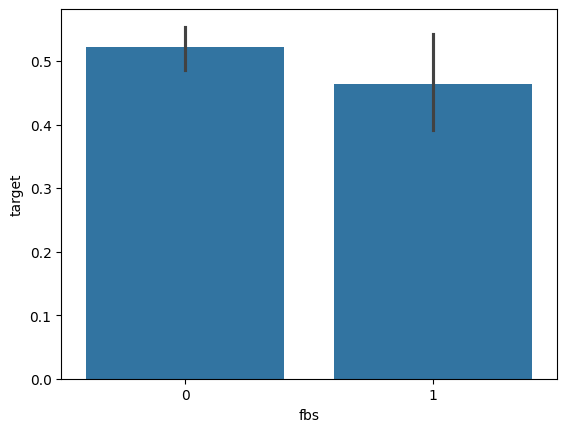

In [29]:
plt.plot()
sns.barplot(x='fbs', y='target', data=heart_data)
plt.show()

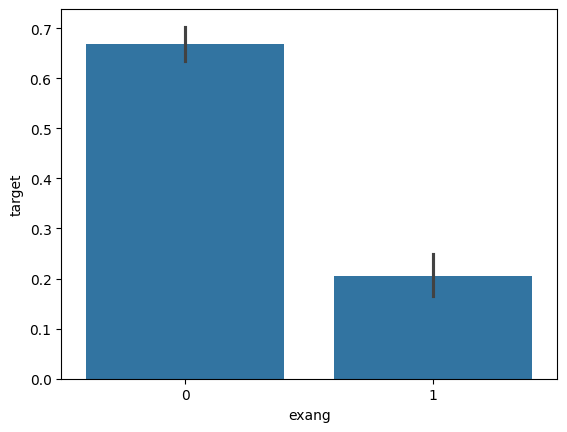

In [30]:
plt.plot()
sns.barplot(x='exang', y='target', data=heart_data)
plt.show()

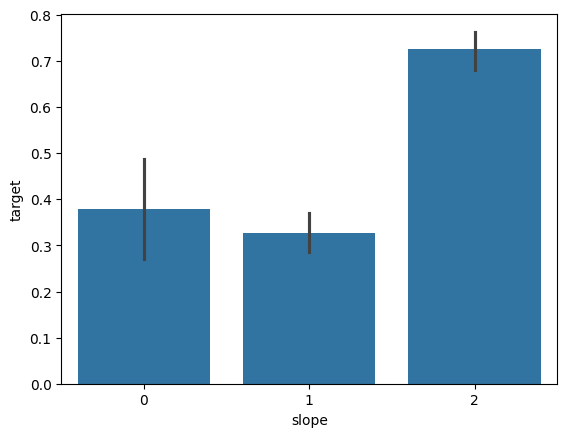

In [31]:
plt.plot()
sns.barplot(x='slope', y='target', data=heart_data)
plt.show()

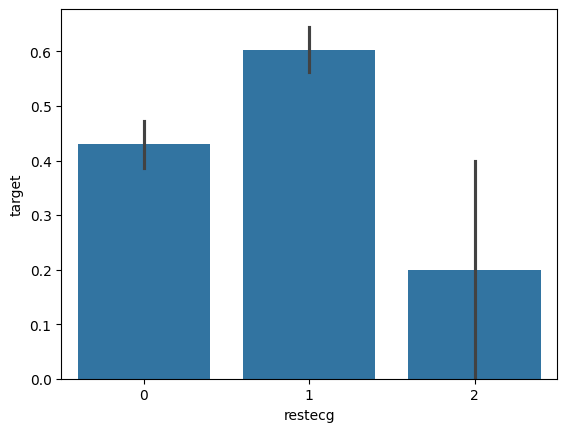

In [32]:
plt.plot()
sns.barplot(x='restecg', y='target', data=heart_data)
plt.show()

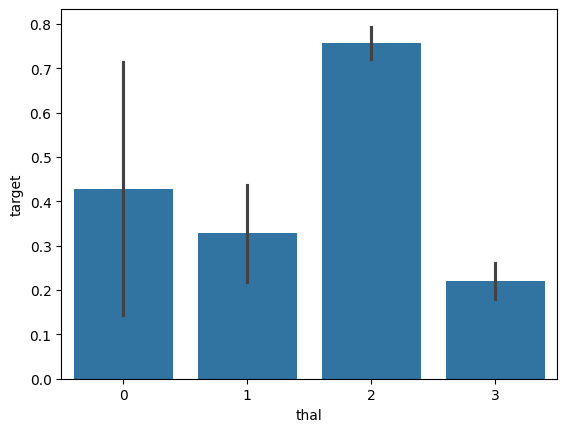

In [33]:
plt.plot()
sns.barplot(x='thal', y='target', data=heart_data)
plt.show()

In [36]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

# Train Test Split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [38]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((820, 13), (205, 13), (820,), (205,))

# Build a Model

### Build a Logestic Regression Model

In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [66]:
preds = log_reg.predict(X_train)
score = accuracy_score(Y_train, preds)
score

0.8524390243902439

In [67]:
preds = log_reg.predict(X_test)
score = accuracy_score(Y_test, preds)
score

0.8048780487804879

In [69]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



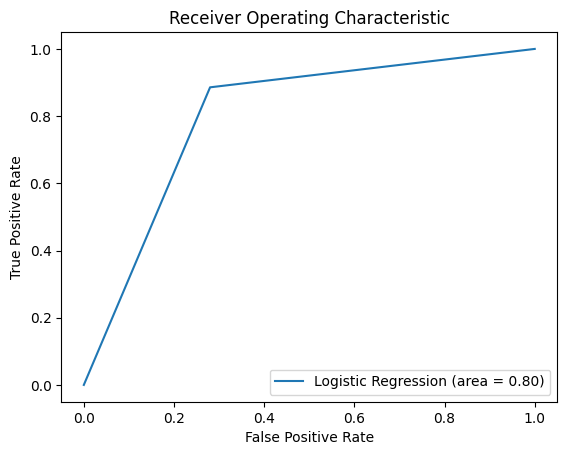

In [71]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Building a KNN Model

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
preds = knn.predict(X_train)
score = accuracy_score(Y_train, preds)
score

0.9926829268292683

In [112]:
preds = knn.predict(X_test)
score = accuracy_score(Y_test, preds)
score

0.9365853658536586

In [113]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       100
           1       0.94      0.93      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



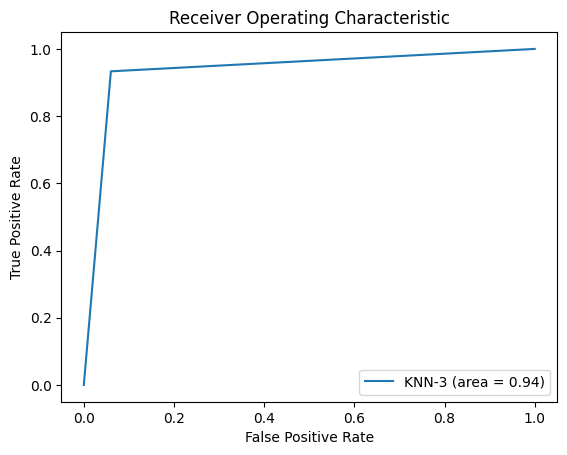

In [114]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='KNN-3 (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Build a Model using SVM

In [115]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
predicted = svc.predict(X_train)
score = accuracy_score(Y_train, predicted)
score

0.8695121951219512

In [116]:
predicted = svc.predict(X_test)
score = accuracy_score(Y_test, predicted)
score

0.824390243902439

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       100
           1       0.78      0.92      0.84       105

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



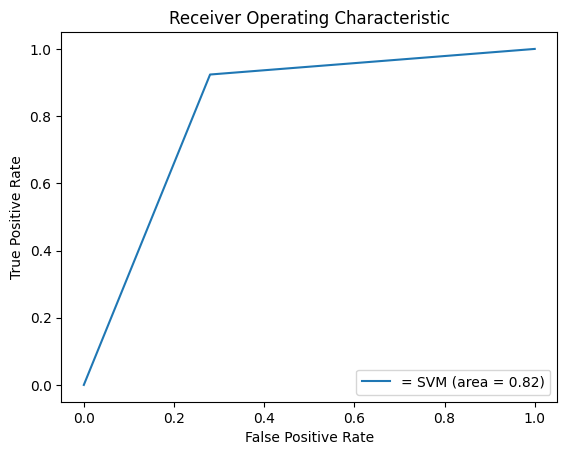

In [117]:
print(classification_report(Y_test, predicted))

fpr, tpr, thresholds = roc_curve(Y_test, predicted)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='= SVM (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Build a Model Using Descision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [120]:
predicted = dtc.predict(X_test)

In [121]:
score = accuracy_score(Y_test, predicted)

In [122]:
score

1.0

In [123]:
predicted = dtc.predict(X_test)
score = accuracy_score(Y_test, predicted)
score

1.0

In [124]:
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



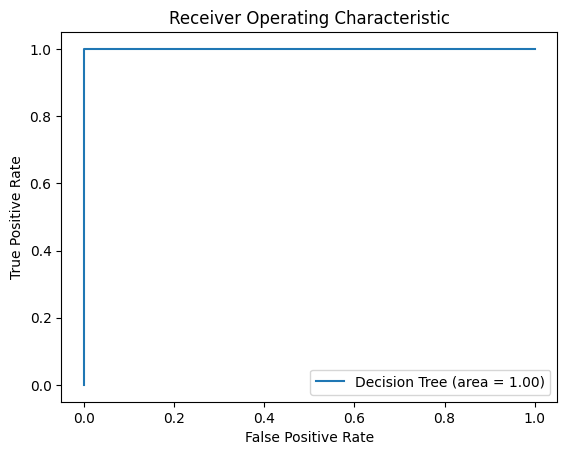

In [125]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, predicted)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Make a Predictive System

In [62]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dtc.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease
